# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0],lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
city_country = zip(cities,countries)        
# Print the city count to confirm sufficient count
len(cities)


583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Run test on API and city
url= 'http://api.openweathermap.org/data/2.5/weather?'
city = 'vermilion'
units = 'Imperial'

query_url = f'{url}q={city}&appid={weather_key}&units={units}'
response=requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 40.17, 'lon': -87.75},
 'dt': 1595892174,
 'id': 4914710,
 'main': {'feels_like': 84.67,
          'humidity': 100,
          'pressure': 1014,
          'temp': 76.62,
          'temp_max': 77,
          'temp_min': 75.99},
 'name': 'Vermilion',
 'sys': {'country': 'US',
         'id': 3850,
         'sunrise': 1595846686,
         'sunset': 1595898600,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 5.82}}


In [5]:
# set up url variable and Imperial(F and mph) variable for making calls
url= "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'        

#empty lists to store API data pull
city_name = []
countries = []
latitude= []
longitude =[]
temperature =[]
humidity = []
cloudiness=[]
wind_mph=[]
# creat textfile for API call of city weathers, CSV of API call information
printlog = open('WeatherPy/weatherAPI_printlog.txt','w')
API_csv = open('WeatherPy/weatherAPI.csv','w')
#create header titles for csv file
API_csv.write('City Name,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness%,Wind MPH\n')


for city, country_code in city_country:
    query_url = f"{url}appid={weather_key}&q={city},{country_code}&units={units}"
    response=requests.get(query_url).json()

    # variables from json file
    try:
        CityName = response['name']
        country = response['sys']['country']
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        temp=response['main']['temp']
        hum=response['main']['humidity']
        cloud=response['clouds']['all']
        winds=response['wind']['speed']
        
        #append variables to your empty lists. 
        
        city_name.append(CityName)
        countries.append(country)
        latitude.append(lat)
        longitude.append(lng)
        temperature.append(temp)
        humidity.append(hum)
        cloudiness.append(cloud)
        wind_mph.append(winds)
        
        #print printlog and csv writing
        print(f'{CityName} was found in the OpenWeather API\n')
        printlog.write(f'{CityName} was found in the OpenWeather API\n')
        API_csv.write(f'{CityName},{country},{lat},{lng},{temp},{hum},{cloud},{winds}\n')
        
    except:
        
        print(f'{CityName} was not found in the OpenWeather API\n')
        printlog.write(f'{CityName} was not found in the OpenWeather API\n')
        
        #append null value for later removal
    
        city_name.append(None)
        countries.append(None)
        latitude.append(None)
        longitude.append(None)
        temperature.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_mph.append(None)
        pass
        
#close print and csv files
API_csv.close()
printlog.close()

Saint George was found in the OpenWeather API

Ushuaia was found in the OpenWeather API

Quatre Cocos was found in the OpenWeather API

Rikitea was found in the OpenWeather API

Rikitea was not found in the OpenWeather API

Brae was found in the OpenWeather API

Brae was not found in the OpenWeather API

Mnogovershinnyy was found in the OpenWeather API

Barrow was found in the OpenWeather API

Hermanus was found in the OpenWeather API

Ribeira Grande was found in the OpenWeather API

New Norfolk was found in the OpenWeather API

Narsaq was found in the OpenWeather API

Punta Alta was found in the OpenWeather API

Thompson was found in the OpenWeather API

San Policarpo was found in the OpenWeather API

Los Llanos de Aridane was found in the OpenWeather API

Seoul was found in the OpenWeather API

Carnarvon was found in the OpenWeather API

Kirkwood was found in the OpenWeather API

Kirkwood was not found in the OpenWeather API

Lorengau was found in the OpenWeather API

Sidi Ali was fo

Tuatapere was not found in the OpenWeather API

São Miguel do Araguaia was found in the OpenWeather API

Yeniseysk was found in the OpenWeather API

Mucurapo was found in the OpenWeather API

Tarko-Sale was found in the OpenWeather API

Pavullo nel Frignano was found in the OpenWeather API

Oodweyne was found in the OpenWeather API

Xiaoweizhai was found in the OpenWeather API

Ekhabi was found in the OpenWeather API

Eureka was found in the OpenWeather API

Ixtapa was found in the OpenWeather API

Faanui was found in the OpenWeather API

Casandrino was found in the OpenWeather API

Santa Fe was found in the OpenWeather API

Turukhansk was found in the OpenWeather API

Pargas was found in the OpenWeather API

Naze was found in the OpenWeather API

Namatanai was found in the OpenWeather API

Saldanha was found in the OpenWeather API

Muhos was found in the OpenWeather API

Bantry was found in the OpenWeather API

Zemio was found in the OpenWeather API

Trairi was found in the OpenWeathe

Antas was found in the OpenWeather API

Halifax was found in the OpenWeather API

Gravdal was found in the OpenWeather API

Taganak was found in the OpenWeather API

Taganak was not found in the OpenWeather API

Bandarbeyla was found in the OpenWeather API

Bandarbeyla was not found in the OpenWeather API

Moindou was found in the OpenWeather API

Changde was found in the OpenWeather API

Staryy Nadym was found in the OpenWeather API

Te Anau was found in the OpenWeather API

Havelock was found in the OpenWeather API

Chokurdakh was found in the OpenWeather API

Horki was found in the OpenWeather API

Bella Union was found in the OpenWeather API

Kangaba was found in the OpenWeather API

Coruripe was found in the OpenWeather API

Coruripe was not found in the OpenWeather API

Matata was found in the OpenWeather API

Matata was not found in the OpenWeather API

Dudinka was found in the OpenWeather API

Souillac was found in the OpenWeather API

Souillac was not found in the OpenWeather 

College was found in the OpenWeather API

Santiago del Estero was found in the OpenWeather API

Carman was found in the OpenWeather API

Road Town was found in the OpenWeather API

Mountain Home was found in the OpenWeather API

Alingsås was found in the OpenWeather API

Mitú was found in the OpenWeather API

Guangming was found in the OpenWeather API

Prieska was found in the OpenWeather API

Kamenka was found in the OpenWeather API

Pochutla was found in the OpenWeather API

Pochutla was not found in the OpenWeather API

Pochutla was not found in the OpenWeather API

Chunskiy was found in the OpenWeather API

Tabora was found in the OpenWeather API

Jizan was found in the OpenWeather API

São Francisco do Sul was found in the OpenWeather API

Kalabo was found in the OpenWeather API

Rossland was found in the OpenWeather API

Mogadishu was found in the OpenWeather API

Cayenne was found in the OpenWeather API



In [11]:

weather_dict= {
    'City': city_name,
    'Country': countries,
    'Latitude': latitude,
    'Longitude': longitude,
    "Temperature":temperature,
    'Humidity %': humidity,
    'Cloud %': cloudiness,
    'Wind (MPH)': wind_mph
    
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity %,Cloud %,Wind (MPH)
0,Saint George,BM,32.38,-64.68,83.14,70.0,40.0,9.17
1,Ushuaia,AR,-54.80,-68.30,33.80,80.0,40.0,20.80
2,Quatre Cocos,MU,-20.21,57.76,66.09,88.0,40.0,2.24
3,Rikitea,PF,-23.12,-134.97,72.25,75.0,78.0,11.12
4,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
weather_df = weather_df.dropna()
weather_df = weather_df.reset_index(drop=True)
weather_df.head(10)

,City,Country,Latitude,Longitude,Temperature,Humidity %,Cloud %,Wind (MPH)
0,Saint George,BM,32.38,-64.68,83.14,70.0,40.0,9.17
1,Ushuaia,AR,-54.80,-68.30,33.80,80.0,40.0,20.80
2,Quatre Cocos,MU,-20.21,57.76,66.09,88.0,40.0,2.24
3,Rikitea,PF,-23.12,-134.97,72.25,75.0,78.0,11.12
4,Brae,GB,60.40,-1.35,55.40,93.0,100.0,5.82
5,Mnogovershinnyy,RU,53.94,139.92,68.23,62.0,29.0,3.94
6,Barrow,US,71.29,-156.79,37.40,86.0,90.0,25.28
7,Hermanus,ZA,-34.42,19.23,46.99,90.0,0.0,6.69
8,Ribeira Grande,PT,38.52,-28.70,74.86,86.0,4.0,4.56
9,New Norfolk,AU,-42.78,147.06,43.30,92.0,46.0,1.34


In [13]:
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity %,Cloud %,Wind (MPH)
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,19.949102,17.607617,66.800566,73.210938,46.849609,7.853750
std,35.138062,90.967712,14.193594,19.516325,38.676475,5.446195
min,-54.800000,-179.170000,33.800000,3.000000,0.000000,0.450000
25%,-9.942500,-59.815000,55.400000,65.000000,4.000000,3.360000
50%,22.885000,22.350000,68.630000,78.000000,40.000000,6.710000
75%,51.760000,97.280000,78.345000,87.000000,88.000000,11.410000
max,78.220000,178.420000,104.860000,100.000000,100.000000,28.860000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

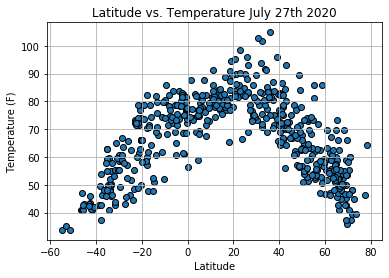

In [23]:
#plt scatter Lat v Temp marker as o put in edgecolor
plt.scatter(weather_df['Latitude'],weather_df['Temperature'], marker ='o', edgecolor='black')
#labels and grid 
plt.title('Latitude vs. Temperature July 27th 2020')
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.grid(True)

#save image to WeatherPy
plt.savefig('WeatherPy/Lat_Temp.png')

plt.show


 There is a correlation that falls on either side of the 20 degree Latitude line. It is middle of the summer in the northern hemisphere, that explains the skew of higher temperatures above the 0 degree latitude.              

## Latitude vs. Humidity Plot

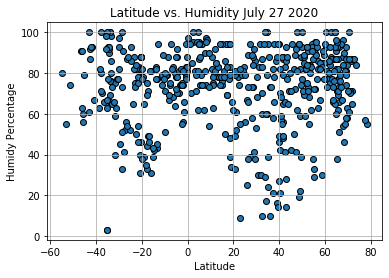

In [29]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity %'], marker = 'o', edgecolor= 'black')
plt.title("Latitude vs. Humidity July 27 2020")
plt.xlabel('Latitude')
plt.ylabel('Humidy Percentage')
plt.grid(True)

plt.savefig('WeatherPy/Lat_Hum.png')
plt.show()

There is no strong correlation between Latitude vs Humidity. A majority of the data points are above the 60% mark could mean that data sample is composed of locations of higher general humidity. 

## Latitude vs. Cloudiness Plot

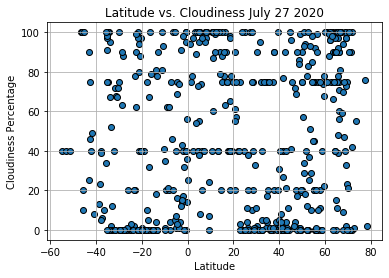

In [30]:
plt.scatter(weather_df['Latitude'],weather_df['Cloud %'], marker='o', edgecolor='black')
plt.title('Latitude vs. Cloudiness July 27 2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.grid(True)

plt.savefig('WeatherPy/Lat_Cloud.png')
plt.show()

Cloudiness vs Latitude has no correlation. Given the plotting along the 20,40,ect. lines, I would like to see how Cloudiness is measured. Is it a Subjective or Objective measurement.

## Latitude vs. Wind Speed Plot

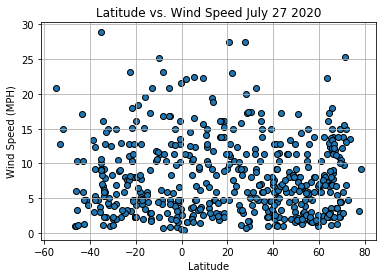

In [31]:
plt.scatter(weather_df['Latitude'],weather_df['Wind (MPH)'], marker = 'o', edgecolor = 'black')
plt.title('Latitude vs. Wind Speed July 27 2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(True)

plt.savefig('WeatherPy/Lat_Speed.png')
plt.show()

The lack of a clear correlation of Latitude and Wind Speed is to be expected. I expect the weight of data points in the 40-60 Latitude will pull the regression line down, given the lack of wind speed out of those data points. 

## Linear Regression

In [63]:
# OPTIONAL: Create a function to create Linear Regression plots
# function needs (x,y) values to plot. (x,y) descriptions, a way to label the N or S hemisphere, file_name for saving,
# and annotation(x,y)starting points
weather_date = 'July 27th 2020'
def reg_line_plot(x_value,y_value,x_desc,y_desc,hemisphere,file_name,x_ann,y_ann):
    #unpack the line of regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value, y_value, edgecolor="black")
    plt.plot(x_value, regress_values, 'r-')
    plt.title(f'{hemisphere}\n {x_desc} vs. {y_desc} {weather_date}')
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color='red')
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f'The r-squared value is :{rvalue}')
    print(line_eq)
    plt.savefig(f'WeatherPy/{file_name}')
    plt.show()            

In [76]:
# Create Northern and Southern Hemisphere DataFrames
# create variable with boolean values to apply to the dataframe 
north= weather_df.Latitude >= 0
south= weather_df.Latitude < 0 
#creat the N/S dataframes with new variables
north_weather = weather_df[north]
south_weather = weather_df[south]

#reset index on both
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)

#north_weather.head()
#south_weather.head()
south_weather.describe()

,Latitude,Longitude,Temperature,Humidity %,Cloud %,Wind (MPH)
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,-21.603757,27.895665,62.226474,72.219653,38.971098,7.965896
std,13.662486,94.890946,13.531975,18.363521,37.615779,5.702243
min,-54.800000,-175.200000,33.800000,3.000000,0.000000,0.540000
25%,-33.400000,-57.500000,50.000000,63.000000,0.000000,3.670000
50%,-21.200000,24.730000,62.640000,77.000000,34.000000,6.150000
75%,-9.800000,121.900000,73.890000,83.000000,75.000000,11.410000
max,-0.180000,176.750000,86.000000,100.000000,100.000000,28.860000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is :-0.7268357260843242
y = -0.49x + 89.13


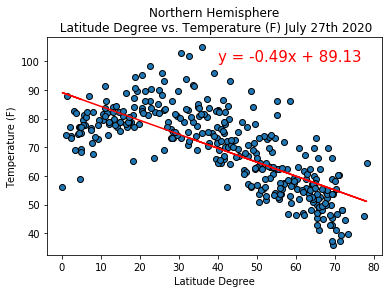

In [65]:
#reg_line_plot(x_value,y_value,x_desc,y_desc,hemisphere,file_name,x_ann,y_ann)

reg_line_plot(north_weather['Latitude'],north_weather['Temperature'],\
             'Latitude Degree','Temperature (F)','Northern Hemisphere','NorthLat_Temp.png',40,100)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is :0.8163368020537671
y = 0.81x + 79.69


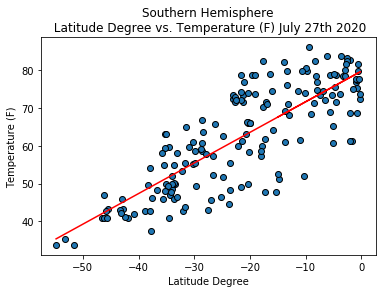

In [66]:
reg_line_plot(south_weather['Latitude'],south_weather['Temperature'],\
             'Latitude Degree','Temperature (F)','Southern Hemisphere','SouthLat_Temp.png',-30,30)

# North/South Latitude vs Temperature
The random data set that was collected has considerably more data points in the Northern Hemisphere compared to the Southern. The Southern Hemisphere has a stronger correlation between the latitude and the temperature. The Northern Hemisphere temperatures are more affected by the time of year(middle summer) that would elevate the temperatures over the first 40 degrees from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is :0.013588720593145677
y = 0.01x + 73.18


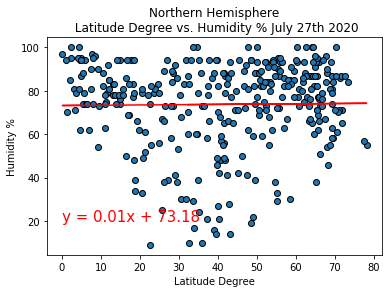

In [67]:
reg_line_plot(north_weather['Latitude'],north_weather['Humidity %'],\
             'Latitude Degree','Humidity %','Northern Hemisphere','NorthLat_Hum.png',0,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is :-0.013714062356252724
y = -0.02x + 71.82


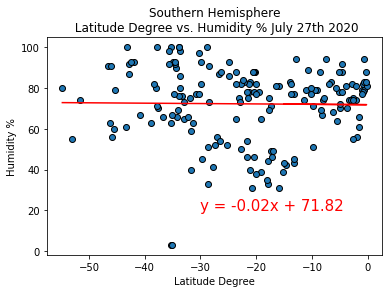

In [68]:
reg_line_plot(south_weather['Latitude'],south_weather['Humidity %'],\
             'Latitude Degree','Humidity %','Southern Hemisphere','SouthLat_Hum.png',-30,20)

# North/South Latitude vs Humidity %
North and South Hemisphere's share a lack of correlation in regards to Humidity % in the data set. This finding is to be expected, as the random assignment of our data points would cover varying locations with varying humidities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is :-0.05340109394209667
y = -0.1x + 54.93


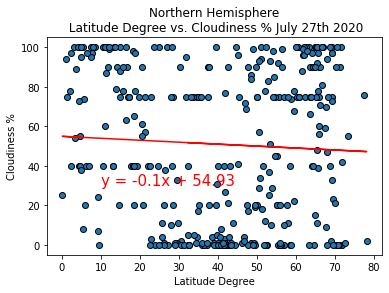

In [69]:
reg_line_plot(north_weather['Latitude'],north_weather['Cloud %'],\
             'Latitude Degree','Cloudiness %', 'Northern Hemisphere','NorthLat_Cloud.png',10,30)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is :-0.03853922210807487
y = -0.11x + 36.68


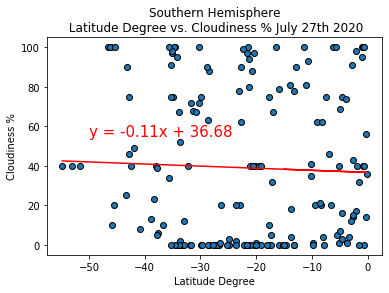

In [75]:
reg_line_plot(south_weather['Latitude'],south_weather['Cloud %'],\
             'Latitude Degree','Cloudiness %', 'Southern Hemisphere','SouthLat_Cloud.png',-50,55)

# North/South Latitude vs. Cloudiness %
The lack correlation between the North/South Latitudes and Cloudiness is expected for similar reasons as to Humidity. The Northern hemisphere has a greater number of data points over the 60% Cloudiness. This could be accounted for the higher energy of storm cycles during the summer months. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is :-0.07052891211682726
y = -0.02x + 8.54


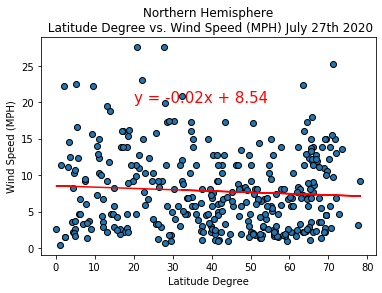

In [74]:
reg_line_plot(north_weather['Latitude'],north_weather['Wind (MPH)'],\
             'Latitude Degree','Wind Speed (MPH)', 'Northern Hemisphere','NorthLat_Wind.png',20,20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is :0.03661408271814971
y = 0.02x + 8.3


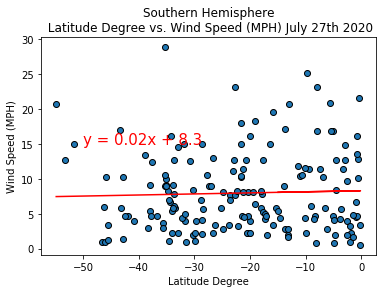

In [73]:
reg_line_plot(south_weather['Latitude'],south_weather['Wind (MPH)'],\
             'Latitude Degree','Wind Speed (MPH)', 'Southern Hemisphere','SouthLat_Wind.png',-50,15)

# North/South Latitude vs. Wind Speed(mph)
The Northern Hemisphere has a slight negative correlation from the 0 degree latitude(equator) while the Southern Hemisphere has a slight positive correlation toward the 0 degree latitude(equator). This shows that on average wind speeds at or near the equator were higher, and they dropped off as you moved towards pole. 